In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
bank_data = pd.read_csv("bank_data.csv", index_col=0)
bank_data.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [93]:
#
# 1) Means, Standard Deviations, Minimums, Maximums, and other statistics of numerical attributes in the Bank Data
#
bank_data.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [94]:
#
# 1) Distributions of values associated with categorical attributes in the Bank Data
#
bank_data.describe(include="object")

,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,600,600,600,600,600,600,600,600
unique,2,4,2,2,2,2,2,2
top,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,300,269,396,304,414,455,391,326


In [95]:
#
# 2) Distribution of Bank Data for numerical and categorical attributes when customers do NOT have PEP
#
no_pep = bank_data["pep"]=="NO"
bank_data[no_pep].describe(include="all")

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,326.000000,326.000000,326.000000,326,326,326,326,326,326,326,326
unique,NaN,NaN,NaN,2,4,2,2,2,2,2,1
top,NaN,NaN,NaN,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,NaN,NaN,NaN,170,146,242,168,235,244,209,326
mean,40.098160,24900.953374,1.067485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14.123506,11661.123422,1.195524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,5014.210000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,15366.475000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,40.000000,23105.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.000000,31210.900000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#
# 2) Distribution of Bank Data for numerical and categorical attributes when customers do have PEP
#
yes_pep = bank_data["pep"]=="YES"
bank_data[yes_pep].describe(include="all")

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,274.000000,274.000000,274.000000,274,274,274,274,274,274,274,274
unique,NaN,NaN,NaN,2,4,2,2,2,2,2,1
top,NaN,NaN,NaN,MALE,INNER_CITY,YES,YES,YES,YES,NO,YES
freq,NaN,NaN,NaN,144,123,154,138,179,211,182,274
mean,45.127737,30644.919453,0.945255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14.327991,13609.613043,0.860571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,7756.360000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,34.000000,19639.475000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,45.000000,28080.050000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,58.000000,38458.350000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# 2) When comparing the two data tables between PEP and non-PEP customers, I found that the average income is about 5000 less for non-PEP customers when compared to customers with PEP.
# Also, the average age for PEP customers is about 5 years older than the non-PEP customers. I also see that a mjority of the customers that do have PEP are male and have a car while
# the majority of non-PEP customers are female aend do not own a car.

In [98]:
#
# 3) Using z-score normalization to standardize the income attribute
#
income_z = (bank_data["income"] - bank_data["income"].mean()) / bank_data["income"].std()
income_z

id
ID12101   -0.773523
ID12102    0.198541
ID12103   -0.848766
ID12104   -0.554180
ID12105    1.787071
             ...   
ID12696    1.511765
ID12697   -1.383916
ID12698   -0.895210
ID12699   -0.993237
ID12700   -0.066083
Name: income, Length: 600, dtype: float64

In [99]:
#
# 4) Discretize Age attribute into 3 categories (Young, Mid-Age, and Old)
#
age_bins = pd.qcut(bank_data.age, [0, .33, .66, 1], labels=["Young", "Mid-Age", "Old"])
age_bins

id
ID12101    Mid-Age
ID12102    Mid-Age
ID12103        Old
ID12104      Young
ID12105        Old
            ...   
ID12696        Old
ID12697      Young
ID12698      Young
ID12699      Young
ID12700    Mid-Age
Name: age, Length: 600, dtype: category
Categories (3, object): ['Young' < 'Mid-Age' < 'Old']

In [100]:
#
# 5) Normalize the numerical attributes in the original table using Min-Max normalization
#
norm_income = (bank_data["income"] - bank_data["income"].min()) / (bank_data["income"].max()-bank_data["income"].min())
norm_age = (bank_data["age"] - bank_data["age"].min()) / (bank_data["age"].max()-bank_data["age"].min())
norm_child = (bank_data["children"] - bank_data["children"].min()) / (bank_data["children"].max()-bank_data["children"].min())

# Changing the original table to the normalized attributes
bank_data["income"] = norm_income
bank_data["age"] = norm_age
bank_data["children"] = norm_child
bank_data.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [101]:
#
# 6) Converting the table into dummy variables by convertin categorical variables to binary values
#
bank_data_dummy = pd.get_dummies(bank_data)
bank_data_dummy.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
ID12102,0.448980,0.431395,1.000000,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
ID12103,0.673469,0.198933,0.000000,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
ID12104,0.102041,0.264320,1.000000,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
ID12105,0.795918,0.783987,0.000000,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [102]:
#
# 6) Creating new csv file of changed dummy variables
#
bank_data_dummy.to_csv("bank_numeric.csv", float_format="%1.2f")

In [103]:
#
# 7) Basic correlation analysis of standardized data set
#
# First using pearson correlation
pearson_corr = bank_data_dummy.corr(method='pearson')
pearson_corr

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


In [104]:
#
# 7) Second method using spearman rank-order correlation
#
spearman_corr = bank_data_dummy.corr(method='spearman')
spearman_corr

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.758911,0.024964,0.090110,-0.090110,-0.025595,0.019310,0.033328,-0.009923,-0.009184,...,-0.076410,0.076410,-0.185386,0.185386,0.033737,-0.033737,0.019121,-0.019121,-0.173045,0.173045
income,0.758911,1.000000,0.028714,0.023729,-0.023729,-0.056053,0.079373,0.021844,-0.017376,0.006693,...,-0.098120,0.098120,-0.230850,0.230850,-0.017240,0.017240,-0.000707,0.000707,-0.211201,0.211201
children,0.024964,0.028714,1.000000,0.008946,-0.008946,-0.044789,0.080534,-0.013926,-0.006647,0.049850,...,-0.038897,0.038897,-0.047357,0.047357,-0.006546,0.006546,0.072095,-0.072095,0.005891,-0.005891
gender_FEMALE,0.090110,0.023729,0.008946,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090110,-0.023729,-0.008946,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025595,-0.056053,-0.044789,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.019310,0.079373,0.080534,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.033328,0.021844,-0.013926,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.009923,-0.017376,-0.006647,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.009184,0.006693,0.049850,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


In [105]:
# 7) When looking at the correlation between the different attributes, the only positive correlation I found was between age and income.
# The correlation coefficient for age and income is about 0.75 using both pearson and spearman correlation methods.
# I deemed this comparison to have a strong correlation becasue its correlation coefficient was above 0.7.
# In terms of the other attributes, I did not find many other strong correlations between any two attributes as most did not go above 0.01 or below -0.01.
# Although there were some attributes that had a small positive correlation with correlation coefficients around 0.17 and 0.2 for age and pep_YES and income pep_YES,
# I did not think they were that significant since the coefficient was not greater than 0.7
# It is also important to note that I did not find much variance in correlation coefficients between the separman and pearson methods as both were very close in values.

<AxesSubplot:xlabel='age', ylabel='income'>

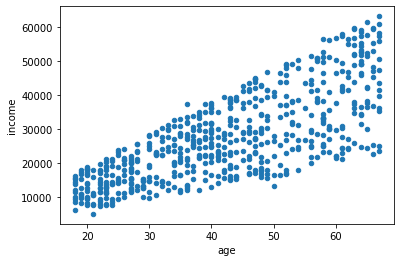

In [106]:
#
# 8) scatterplot to show the correlation between income and age (non-normalized data).
#
bank_data = pd.read_csv("bank_data.csv", index_col=0)
bank_data.plot(x="age", y="income", kind="scatter")

# Based on the scatterplot produced, we can see that there is a correlation between income and age because as the age increases, so does the income

<AxesSubplot:xlabel='income', ylabel='Frequency'>

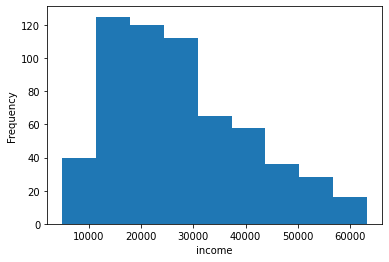

In [107]:
#
# 9) Histogram for income with 9 bins (non-normalized data)
#
income_hist = bank_data["income"].plot(kind="hist", bins=9)
income_hist.set_xlabel("income")
income_hist

<AxesSubplot:xlabel='age', ylabel='Frequency'>

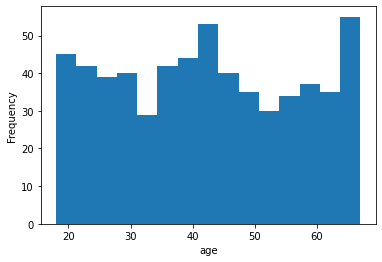

In [108]:
#
# 9) Histogram for age with 15 bins (non-normalized data)
#
age_hist = bank_data["age"].plot(kind="hist", bins=15)
age_hist.set_xlabel("age")
age_hist

<AxesSubplot:>

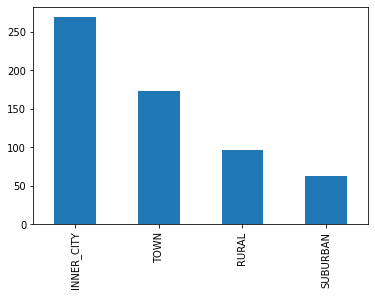

In [109]:
#
# 10) Bar graph to represent the distribution of the region attribute
#
bank_data["region"].value_counts().plot(kind='bar')

In [110]:
#
# 11) Cross-tabulation of the region attribute with the pep attribute.
#
# first grouping the occurrences of each pep value amongst the regions
bank_data.groupby(["region","pep"])["pep"].count()

region      pep
INNER_CITY  NO     146
            YES    123
RURAL       NO      50
            YES     46
SUBURBAN    NO      28
            YES     34
TOWN        NO     102
            YES     71
Name: pep, dtype: int64

In [111]:
# performing the cross-tabulation on the grouped data
rp = pd.crosstab(bank_data["region"], bank_data["pep"])
rp

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


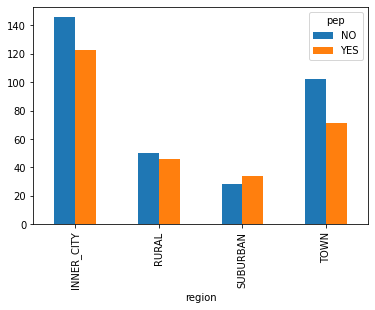

In [112]:
# bar graph to show the cross-tabulation with entries representing the counts.
plt.show(rp.plot(kind="bar"))